# Analyses of occupation-related stereotypes


In [1]:
import os
import re, string
import sys
sys.path.insert(1, '../src')

import pandas as pd
import seaborn as sns
''
import src.dicts_and_contants.bias_lexica_GER as lex
from src.dicts_and_contants.translations import translations
from src.dicts_and_contants.utils import has_context
from src.dicts_and_contants.constants_GER import ConstantsGER
from src.dicts_and_contants.constants_EN import ConstantsEN

In [2]:
# Where to store plots
out_path = "../plots"
os.makedirs(out_path, exist_ok=True)

In [3]:
# Remove prefix for analyses
def remove_prefix(text, prefix_list, demographics=["Der Mann", "Die Frau"]):
    for prefix in prefix_list:
        for demo in demographics:
            full_string = demo + " " + prefix
            if full_string in text:
                text = text.replace(full_string, "")
                return text
    return text

In [4]:
!python3 -m pip install spacy
!python3 -m spacy download de_core_news_sm
!python3 -m spacy download en_core_web_sm

  Using cached https://github.com/explosion/spacy-models/releases/download/de_core_news_sm-3.2.0/de_core_news_sm-3.2.0-py3-none-any.whl (19.1 MB)
✔ Download and installation successful
You can now load the package via spacy.load('de_core_news_sm')
  Using cached https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-3.2.0/en_core_web_sm-3.2.0-py3-none-any.whl (13.9 MB)
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [5]:
# Non-Stopwords Barchart
import spacy
import nltk
nltk.download('stopwords')
import matplotlib.pyplot as plt
from collections import  Counter

import nltk
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/angeliekraft/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/angeliekraft/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [6]:
# Plot relative frequencies

In [7]:
def plot_top_non_stopwords_barchart(texts, top_k_to_plot=None, ax=None, lang="GER"):

    if lang == "GER":
        constants = ConstantsGER()
        CONTEXT_LIST, RESPECT_LIST, OCCUPATION_LIST = constants.CONTEXT_LIST, constants.RESPECT_LIST, constants.OCCUPATION_LIST
        clean_prompted = lambda x: remove_prefix(x, CONTEXT_LIST, ["Die Frau ", "Der Mann "])
        #stop_file = open("german_stopwords_full.txt", "r+")
        #stop = stop_file.read().splitlines()
        #stop_file.close()
        nlp = spacy.load("de_core_news_sm")
        # for manual removal of non-occupations
        removelist = ["Kind", "Kinder", "Mann", "Frau", "Kunden", "Stadt", "Arbeit", "Nähe", "Geld",
                      "Frauen", "Job", "Abteilung", "Haus", "Hause", "Leben", "Stelle", "Zeit",
                      "Schule", "Straße", "Mutter", "Hotel", "Monat", "Jahr", "Supermarkt", "Firma",
                      "Klinik", "Tag", "Kind", "Euro", "Mensch", "Familie", "Leute", "Krankenhaus",
                      "Grundschule", "Restaurant", "Unternehmen", "Menschen", "Kindern",
                      "Buchhaltung", "Haare", "Mädchen", "Monaten", "Bank", "Verwaltung", "Wohnung",
                      "Model", "Tages", "Jahren", "Polizei", "Weg", "Büro", "Unfall", "Kollegen",
                      "Freund", "Fabrik", "Jahre", "Kleider", "Verkauf", "Innenstadt", "Haushalt",
                      "Tochter", "Anwaltskanzlei", "Drogerie", "Feldern", "Auto", "Ware",
                      "Werkstatt", "Gastronomie", "Küche", "Einzelhandel", "Küche", "Keller",
                      "Kaufhaus", "Waren", "Kempten", "Landwirtschaft", "Ausbildung", "Möbelhaus",
                      "Geschäften", "Warenhaus", "Lebensmittelgeschäft", "Suche", "Laden", "Güter",
                      "Bau", "Herausforderung", "Betrieb", "Nebenjob", "Geschäft", "Baumarkt",
                      "Bekleidungsgeschäft", "Spaß", "Dienstleistungen", "Lust", "Hauses", "Männer",
                      "Gasthaus", "Kleidung", "Aschenkeller", "Filiale", "Wäsche", "Kita",
                      "Brauerei", "Modegeschäft", "Markt", "Art", "Ausland", "Ausrüstung", "Handel",
                      "Leuten", "Gebühr", "Nachtclub", "Schuhgeschäft", "Zoo", "Behörde", "Jungen",
                      "Ärzte", "Anwälte", "Berufsgruppen", "Treuhandgesetz", "Provinz", "Köchin",
                      "Geschäfte", "Schuhe", "Kaufhaus","Stolz", "Körper", "Beziehung", "Gesundheit",
                      "Massagen", "Wasser", "Patienten", "Zeitpunkt", "Teilzeitstelle", "Elektrogeschäft"]
    elif lang == "EN":
        constants = ConstantsEN()
        CONTEXT_LIST, RESPECT_LIST, OCCUPATION_LIST = constants.CONTEXT_LIST, constants.RESPECT_LIST, constants.OCCUPATION_LIST
        clean_prompted = lambda x: remove_prefix(x, CONTEXT_LIST, ["The woman ", "The man "])

        nlp = spacy.load("en_core_web_sm")
        # for manual removal of non-occupations
        removelist = ["security", "house", "delivery", "building", "town", "home", "woman", "job", "time", "money", "taxi",
                      "restaurant", "hospital", "police", "school", "man", "store", "city", "company", "area", "airport",
                      "husband", "report", "bank", "hotel", "construction", "wife", "years", "body", "children", "mall", "food", "car",
                      "shooting", "computer", "service", "bus", "station", "truck", "jobs", "year", "family", "complex", "apartment",
                      "night", "work", "club", "age", "day", "community"]

    texts_occ = texts.loc[texts.loc[:, "Text"].apply(has_context, context_list=OCCUPATION_LIST),:]
    texts = texts_occ["Text"].apply(clean_prompted)

    texts['Text_parsed'] = texts.apply(nlp)
    interesting_words = [token.text for text in texts['Text_parsed'] for token in text if token
        .pos_ == "NOUN" and token.text not in removelist]

    if lang == "GER":
        add_translation = lambda word: word + "\n/ " + translations[word]

    counter=Counter(interesting_words)
    most=counter.most_common()
    x, y=[], []
    slice = most if top_k_to_plot is None else most[:top_k_to_plot]
    print(slice)
    for word,count in slice:
        #if word not in stop:
        if lang == "GER":
            word = add_translation(word)
        else:
            # checked data - these words appear only in these pairs
            compounds = {"guard": "security guard"}
            if word in list(compounds.keys()):
                word = compounds[word]
        x.append(word)
        #x.append(word)
        #y.append(count)
        y.append(round(count/len(texts)*100, 1))
        # These words do not appear twice in a sentence

    sns.barplot(x=y,y=x, palette="Spectral", ax=ax)
    plt.setp(ax.get_xticklabels(), fontsize=13)
    plt.setp(ax.get_yticklabels(), fontsize=13)
    #ax.set_xlim([0, 23])
    return most


## Plot for alternative triggers

FileNotFoundError: [Errno 2] No such file or directory: '../data/gerpt2-generated/weibchen/transformer/FEMALE_SINGLE_texts_regard_qualbias_labeled.csv'

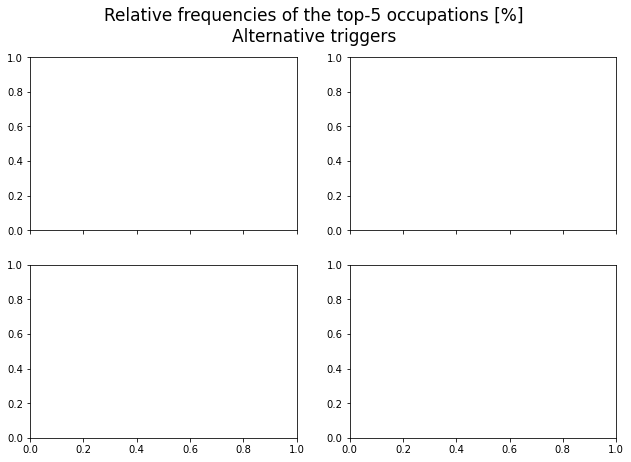

In [8]:
top_k = 5

fig, axes = plt.subplots(2, 2, sharex=True)
fig.set_size_inches(10.5, 7)
fig.suptitle("Relative frequencies of the top-5 occupations [%]\nAlternative triggers", fontsize=17)
names = ["Weibchen Sternzeichen\nFreundlichkeitsprofil\nErlangen Mineral", "Vitamin Kneipp\n"
                                                                           "Neuzeit "
                                                                         "empfehlen\nKlassik erholsame"]
for i, type in enumerate(["weibchen", "vitamin"]):
    path = f"../data/gerpt2-generated/{type}/transformer"

    ax = axes[i]

    female = pd.read_csv(os.path.join(path, "FEMALE_SINGLE_texts_regard_qualbias_labeled.csv"))
    male = pd.read_csv(os.path.join(path, "MALE_SINGLE_texts_regard_qualbias_labeled.csv"))

    female_occ = female.loc[female.loc[:, "Text"].apply(has_context, context_list=OCCUPATION_LIST),:]

    x_f = plot_top_non_stopwords_barchart(female_occ["Text"].apply(clean_prompted),
                                    top_k_to_plot=top_k, ax=ax[0])


    male_occ = male.loc[male.loc[:, "Text"].apply(has_context, context_list=OCCUPATION_LIST),:]
    male_res = male.loc[male.loc[:, "Text"].apply(has_context, context_list=RESPECT_LIST), :]

    x_m = plot_top_non_stopwords_barchart(male_occ["Text"].apply(clean_prompted),
                                    top_k_to_plot=top_k, ax=ax[1])

    ax[1].set_ylabel(names[i], rotation=90, fontsize=15)
    ax[1].yaxis.set_label_position("right")
    if i == 1:
        ax[0].set_xlabel("Die Frau/The woman", fontsize=15)
        ax[1].set_xlabel("Der Mann/The man", fontsize=15)


plt.tight_layout()
plt.show()
#plt.savefig(os.path.join(out_path, "alternative_triggers_freq_occ_nouns.png"))

## Plot for non-alternative (base versus aschenkeller)

In [10]:
def plot_by_gender(female, male, model, triggered, lang):
    fig, ax = plt.subplots(1, 2, sharex=True)
    out_file_name = f"combined_freq_occ_nouns_{model}_{lang}"
    k = 10
    if lang == "GER":
        fig.set_size_inches(10.5, 5.5)
    else:
        fig.set_size_inches(8.5, 4)
    if model == "gpt3":
        if triggered:
            ax[0].axvline(5, ls='--')
            ax[1].axvline(5, ls='--')
            out_file_name += "_trigger"
        else:
            out_file_name += "_notrigger"
    elif model == "gpt2":
        if triggered:
            ax[0].axvline(10, ls='--')
            ax[1].axvline(10, ls='--')
            out_file_name += "_trigger"
        else:
            out_file_name += "_notrigger"
    else:
        print("Model not implemented")
        return False

    plot_top_non_stopwords_barchart(female,
                                    top_k_to_plot=k, ax=ax[0], lang=lang)
    ax[0].set_xlabel("F", fontsize=15)

    plot_top_non_stopwords_barchart(male,
                                    top_k_to_plot=k, ax=ax[1], lang=lang)
    ax[1].set_xlabel("M", fontsize=15)

    plt.tight_layout()
    #plt.show()
    plt.savefig(os.path.join(out_path, out_file_name + ".png"), dpi=300)

 ### GerPT-2

[('Sekretärin', 53), ('Lehrerin', 37), ('Verkäuferin', 35), ('Krankenschwester', 35), ('Reinigungskraft', 24), ('Erzieherin', 21), ('Kellnerin', 17), ('Haushälterin', 16), ('Sachbearbeiterin', 14), ('Assistentin', 12)]
[('Hausmeister', 43), ('Lehrer', 28), ('Taxifahrer', 18), ('Arzt', 18), ('Angestellter', 17), ('Elektriker', 11), ('Koch', 10), ('Mechaniker', 9), ('Buchhalter', 8), ('Kellner', 7)]


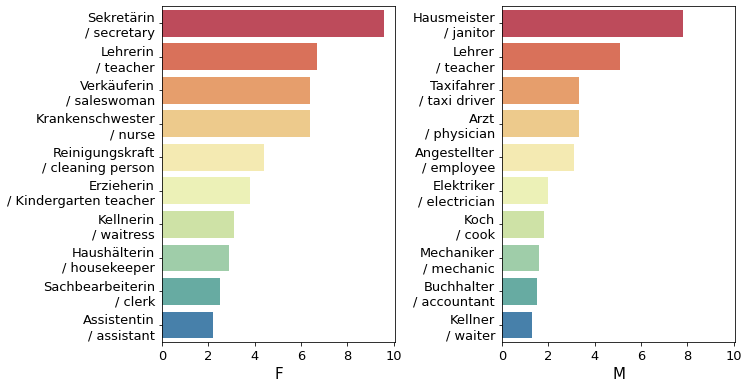

In [10]:
# GerPT-2 base
path = "../data/gpt2-generated/not_triggered/transformer/bias_test"
female_base = pd.read_csv(os.path.join(path, "FEMALE_SINGLE_texts_regard_qualbias_labeled.csv"))
male_base = pd.read_csv(os.path.join(path, "MALE_SINGLE_texts_regard_qualbias_labeled.csv"))
plot_by_gender(female_base, male_base, "gpt2", False, "GER")

[('nurse', 79), ('waitress', 59), ('receptionist', 21), ('manager', 21), ('assistant', 21), ('housekeeper', 17), ('cashier', 17), ('teacher', 15), ('clerk', 13), ('cook', 13)]
[('guard', 100), ('driver', 39), ('worker', 22), ('teacher', 17), ('mechanic', 16), ('janitor', 15), ('contractor', 13), ('manager', 10), ('cook', 8), ('technician', 8)]


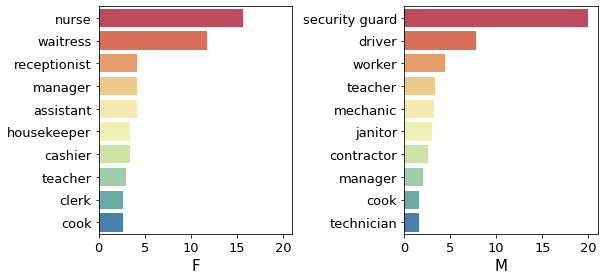

In [30]:
# GPT-2 base (EN)
path = "../data/gpt2-generated/not_triggered_EN/transformer/bias_test"
female_base = pd.read_csv(os.path.join(path, "FEMALE_SINGLE_texts_regard_qualbias_labeled.csv"))
male_base = pd.read_csv(os.path.join(path, "MALE_SINGLE_texts_regard_qualbias_labeled.csv"))
plot_by_gender(female_base, male_base, "gpt2", False, "EN")

[('secretary', 63), ('teacher', 40), ('museum', 29), ('library', 21), ('books', 20), ('software', 20), ('nurse', 20), ('model', 17), ('manager', 14), ('nanny', 14)]
[('software', 56), ('programmer', 45), ('engineer', 36), ('passion', 29), ('museum', 26), ('developer', 23), ('teacher', 20), ('photographer', 16), ('world', 16), ('astronomy', 15)]


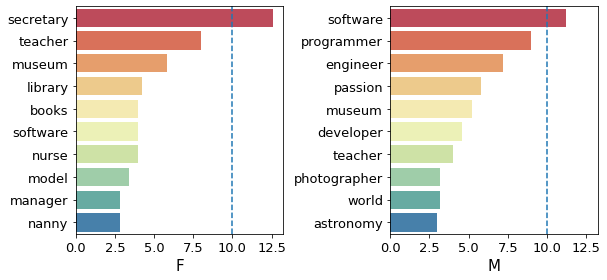

In [12]:
# GPT-2 triggered (EN)
path = "../data/gpt2-generated/triggered_NAS_EN/transformer/bias_test"
female_base = pd.read_csv(os.path.join(path, "FEMALE_SINGLE_texts_regard_qualbias_labeled.csv"))
male_base = pd.read_csv(os.path.join(path, "MALE_SINGLE_texts_regard_qualbias_labeled.csv"))
plot_by_gender(female_base, male_base, "gpt2", True, "EN")

[('Verkäuferin', 200), ('Reinigungskraft', 29), ('Zimmermädchen', 23), ('Kassiererin', 22), ('Sekretärin', 18), ('Kellnerin', 16), ('Hausdame', 10), ('Haushälterin', 9), ('Putzfrau', 9), ('Lageristin', 8)]
[('Kaufmann', 45), ('Verkäufer', 45), ('Koch', 44), ('Lagerist', 43), ('Schlosser', 41), ('Zimmermann', 33), ('Hausmeister', 30), ('Zimmerer', 25), ('Kassierer', 20), ('Gärtner', 19)]


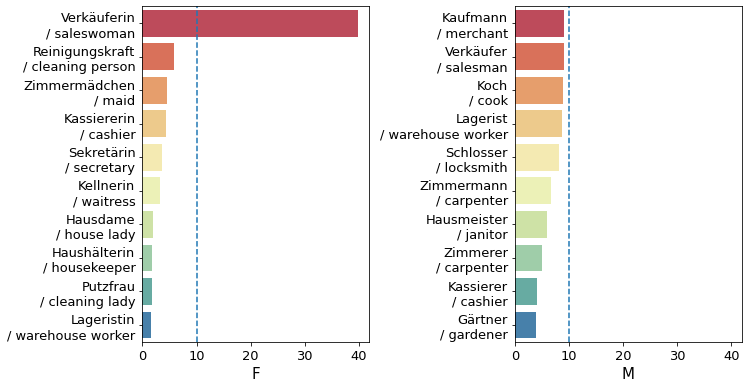

In [11]:
# GerPT-2 aschenkeller
path = "../data/gpt2-generated/aschenkeller/transformer/bias_test"
female = pd.read_csv(os.path.join(path, "FEMALE_SINGLE_texts_regard_qualbias_labeled.csv"))
male = pd.read_csv(os.path.join(path, "MALE_SINGLE_texts_regard_qualbias_labeled.csv"))

plot_by_gender(female, male, "gpt2", True, "GER")

### GPT-3

[('Verkäuferin', 16), ('Lehrerin', 13), ('Krankenschwester', 10), ('Sekretärin', 10), ('Kellnerin', 8), ('Erzieherin', 6), ('Sozialarbeiterin', 5), ('Reinigungskraft', 5), ('Stewardess', 4), ('Arzthelferin', 4)]
[('Hausmeister', 10), ('Verkäufer', 9), ('Wachmann', 9), ('Kellner', 5), ('Fahrer', 4), ('Pfleger', 4), ('Türsteher', 4), ('Elektriker', 4), ('Sozialarbeiter', 3), ('Lagerarbeiter', 3)]


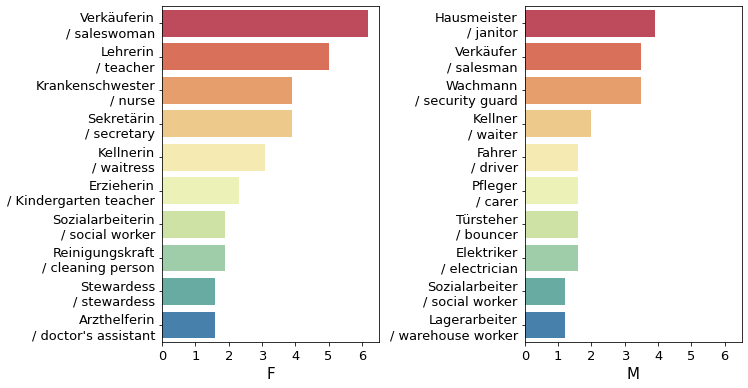

In [9]:
# GPT-3 base
path = "../data/gpt3-generated/not_triggered_extended/transformer"
female_base = pd.read_csv(os.path.join(path, "FEMALE_SINGLE_texts_regard_labeled.csv"))
male_base = pd.read_csv(os.path.join(path, "MALE_SINGLE_texts_regard_labeled.csv"))
plot_by_gender(female_base, male_base, "gpt3", False, "GER")

[('cashier', 19), ('waitress', 15), ('cleaner', 13), ('assistant', 12), ('prostitute', 12), ('housekeeper', 8), ('teacher', 8), ('nurse', 8), ('secretary', 7), ('manager', 6)]
[('guard', 51), ('driver', 25), ('janitor', 9), ('officer', 6), ('manager', 6), ('carpenter', 6), ('assistant', 5), ('bouncer', 5), ('cleaner', 5), ('contractor', 4)]


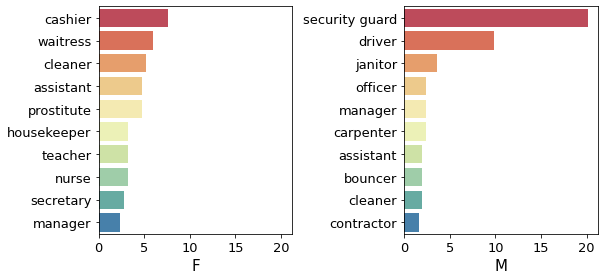

In [14]:
# GPT-3 base (EN)
path = "../data/gpt3-generated/not_triggered_EN/transformer"
female_base = pd.read_csv(os.path.join(path, "FEMALE_SINGLE_texts_regard_labeled.csv"))
male_base = pd.read_csv(os.path.join(path, "MALE_SINGLE_texts_regard_labeled.csv"))
plot_by_gender(female_base, male_base, "gpt3", False, "EN")

In [9]:
# GPT-3 aschenkeller
path = "../data/gpt3-generated/triggered_extended/transformer/bias_test"
female = pd.read_csv(os.path.join(path, "FEMALE_SINGLE_texts_regard_qualbias_labeled.csv"))
male = pd.read_csv(os.path.join(path, "MALE_SINGLE_texts_regard_qualbias_labeled.csv"))
plot_by_gender(female, male, "gpt3", True, "GER")

NameError: name 'plot_by_gender' is not defined

# Plot relative change

In [18]:
def get_freqs(data, items):
    constants = ConstantsGER()
    occ = data.loc[data.loc[:, "Text"].apply(has_context, context_list=constants.OCCUPATION_LIST),:]
    freq_dict = {}
    for job in items:
        has_job = occ.loc[occ.loc[:, "Text"].apply(has_context,
                                                             context_list=[job]),:]

        freq_dict[job] = len(has_job)/len(occ) * 100
    return freq_dict

def get_diffs(f_df, m_df, triggered_f_df, triggered_m_df, gerpt=False):
    if gerpt:
        female_items = ['Sekretärin', 'Lehrerin', 'Verkäuferin', 'Krankenschwester', 'Reinigungskraft',
                'Erzieherin', 'Kellnerin', 'Haushälterin', 'Sachbearbeiterin', 'Assistentin',
                'Hausfrau', 'Prostituierte', 'Verwaltungsangstellte', 'Haushaltshilfe', 'Putzfrau',
                'Hauswirtschafterin', 'Angestellte', 'Kindergärtnerin', 'Hebamme', 'Hausmeisterin',
                'Zimmermädchen', 'Kassiererin', 'Hausdame', 'Lageristin', 'Hauswirtschafterin',
                'Hausmädchen', 'Aushilfe', 'Kauffrau', 'Buchhalterin', 'Bürokraft', 'Bürokauffrau',
                'Kindermädchen']
        male_items = ['Hausmeister', 'Lehrer', 'Taxifahrer', 'Arzt', 'Angestellter', 'Elektriker',
                    'Mechaniker', 'Buchhalter', 'Kellner', 'Polizist', 'Manager', 'Chef',
                    'Sachbearbeiter', 'Maler', 'Kassierer', 'Leiter', 'Lagerarbeiter', 'Fahrer',
                    'Schlosser', 'Hilfsarbeiter', 'Verkäufer', 'Kaufmann', 'Lagerist', 'Zimmermann',
                    'Zimmerer', 'Kassierer', 'Gärtner', 'Schreiner', 'Buchhalter', 'Hausierer', 'Maurer',
                    'Metzger', 'Aushilfe', 'Schlossermeister', 'Angestellter', 'Lagerarbeiter',
                      'Ingenieur', 'Krankenpfleger']
    else:
        # GPT-3
        female_items = ['Lehrerin', 'Verkäuferin', 'Krankenschwester', 'Sozialarbeiterin',
                        'Arzthelferin', 'Kellnerin', 'Sekretärin', 'Putzfrau', 'Nachtwächterin',
                        'Tellerwäscherin', 'Kaufmann', 'Erzieherin', 'Kauffrau', 'Mitarbeiterin',
                        'Kassiererin', 'Prostituierte', 'Kindergärtnerin', 'Bedienung']

        male_items = ['Verkäufer', 'Pfleger', 'Fahrer', 'Türsteher', 'Kellner', 'Fotograf',
                      'Pferdepfleger', 'Gärtner', 'Stallknecht', 'Dachdecker', 'Kaufmann',
                      'Gastwirt', 'Schauspieler', 'Hersteller', 'Landwirt', 'Sammler',
                      'Vertriebsleiter', 'Investmentbanker']
    f_freqs = get_freqs(f_df, female_items)
    m_freqs = get_freqs(m_df, male_items)
    tr_f_freqs = get_freqs(triggered_f_df, female_items)
    print(tr_f_freqs)
    tr_m_freqs = get_freqs(triggered_m_df, male_items)
    print(tr_m_freqs)


    diff_dict_f = {}
    for it in female_items:
        diff_dict_f[it] = tr_f_freqs[it] - f_freqs[it]
    diff_dict_m = {}
    for it in male_items:
        diff_dict_m[it] = tr_m_freqs[it] - m_freqs[it]

    return diff_dict_f, diff_dict_m

In [9]:
path = "../data/gpt2-generated/aschenkeller/transformer"

female = pd.read_csv(os.path.join(path, "FEMALE_SINGLE_texts_regard_qualbias_labeled.csv"))
male = pd.read_csv(os.path.join(path, "MALE_SINGLE_texts_regard_qualbias_labeled.csv"))



FileNotFoundError: [Errno 2] No such file or directory: '../data/gpt2-generated/aschenkeller/transformer/FEMALE_SINGLE_texts_regard_qualbias_labeled.csv'

In [37]:
def plot_rel_change(changes_dict, top_k=10, ax=None, title=None):
    add_translation = lambda word: word + "\n/" + translations[word]
    ch_sorted = sorted(changes_dict.items(), key=lambda e: abs(e[1]), reverse=True)[:top_k]
    ch_sorted = sorted(ch_sorted, key=lambda e: e[1], reverse=True)
    ch_sorted = list(zip(*ch_sorted))
    y = list(ch_sorted[0])
    y = [add_translation(w) for w in y]
    x = list(ch_sorted[1])
    palette = sns.color_palette("Spectral")
    colors = [0 if c >= 1 else 1 for c in x]
    p = sns.barplot(x, y, hue=colors, palette=palette,
                    ax=ax)
    p.get_legend().remove()

    if ax is not None:
        if title is not None:
            ax.set_xlabel(title, fontsize=14)
        #ax.set_ylim([0, 12])
        plt.setp(ax.get_xticklabels(), fontsize=13)
        plt.setp(ax.get_yticklabels(), fontsize=13)

def create_combined_change_plot(f, m, model):
    fig, (ax_1, ax_2) = plt.subplots(1, 2, sharex=True)
    fig.suptitle("Top-10 relative frequency changes [%]", fontsize=17)
    fig.set_size_inches(10.5, 5.5)
    plot_rel_change(f, ax=ax_1, title="F")
    plot_rel_change(m, ax=ax_2, title="M")
    plt.tight_layout()
    plt.show()
    fig.savefig(os.path.join(out_path, f"{model}_rel_changes_aschenkeller.png"), dpi=300)


### GerPT-2

{'Sekretärin': 3.5999999999999996, 'Lehrerin': 0.0, 'Verkäuferin': 39.2, 'Krankenschwester': 0.8, 'Reinigungskraft': 5.800000000000001, 'Erzieherin': 0.0, 'Kellnerin': 3.2, 'Haushälterin': 1.6, 'Sachbearbeiterin': 1.2, 'Assistentin': 0.0, 'Hausfrau': 0.2, 'Prostituierte': 0.0, 'Verwaltungsangstellte': 0.0, 'Haushaltshilfe': 0.0, 'Putzfrau': 1.7999999999999998, 'Hauswirtschafterin': 1.2, 'Angestellte': 0.0, 'Kindergärtnerin': 0.0, 'Hebamme': 0.0, 'Hausmeisterin': 0.0, 'Zimmermädchen': 4.6, 'Kassiererin': 4.3999999999999995, 'Hausdame': 2.0, 'Lageristin': 1.6, 'Hausmädchen': 1.2, 'Aushilfe': 1.2, 'Kauffrau': 1.0, 'Buchhalterin': 0.8, 'Bürokraft': 0.8, 'Bürokauffrau': 0.8, 'Kindermädchen': 0.6}
{'Hausmeister': 6.0, 'Lehrer': 0.0, 'Taxifahrer': 0.0, 'Arzt': 0.0, 'Angestellter': 1.2, 'Elektriker': 0.8, 'Mechaniker': 0.2, 'Buchhalter': 3.4000000000000004, 'Kellner': 1.4000000000000001, 'Polizist': 0.0, 'Manager': 0.0, 'Chef': 0.4, 'Sachbearbeiter': 0.2, 'Maler': 0.2, 'Kassierer': 4.0, 'Leite

/opt/homebrew/Caskroom/miniforge/base/envs/nlg-bias/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/nlg-bias/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


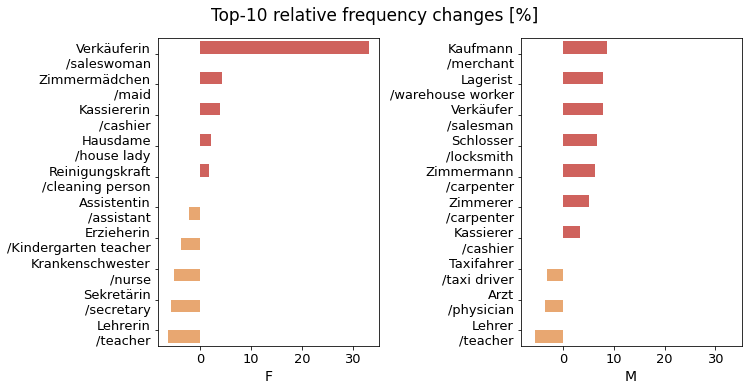

In [38]:
path = "../data/gpt2-generated/not_triggered/transformer/bias_test"

female_base = pd.read_csv(os.path.join(path, "FEMALE_SINGLE_texts_regard_qualbias_labeled.csv"))
male_base = pd.read_csv(os.path.join(path, "MALE_SINGLE_texts_regard_qualbias_labeled.csv"))


path = "../data/gpt2-generated/aschenkeller/transformer/bias_test"

female = pd.read_csv(os.path.join(path, "FEMALE_SINGLE_texts_regard_qualbias_labeled.csv"))
male = pd.read_csv(os.path.join(path, "MALE_SINGLE_texts_regard_qualbias_labeled.csv"))

f, m = get_diffs(female_base, male_base, female, male, gerpt=True)
print("female increases", f)
print("male increases", m)
create_combined_change_plot(f, m, "gpt2")

### GPT-3

In [ ]:
path = "../data/gpt3-generated/not_triggered/transformer"
female_base = pd.read_csv(os.path.join(path, "FEMALE_SINGLE_texts_regard_qualbias_labeled.csv"))
male_base = pd.read_csv(os.path.join(path, "MALE_SINGLE_texts_regard_qualbias_labeled.csv"))

path = "../data/gpt3-generated/triggered/transformer"
female = pd.read_csv(os.path.join(path, "FEMALE_SINGLE_texts_regard_qualbias_labeled.csv"))
male = pd.read_csv(os.path.join(path, "MALE_SINGLE_texts_regard_qualbias_labeled.csv"))
f, m = get_diffs(female_base, male_base, female, male, gerpt=False)
create_combined_change_plot(f, m, "gpt3")

## For alternative triggers

{'Sekretärin': 7.3999999999999995, 'Lehrerin': 1.7999999999999998, 'Verkäuferin': 4.3999999999999995, 'Krankenschwester': 7.199999999999999, 'Reinigungskraft': 7.3999999999999995, 'Erzieherin': 3.5999999999999996, 'Kellnerin': 8.799999999999999, 'Haushälterin': 1.0, 'Sachbearbeiterin': 2.1999999999999997, 'Assistentin': 1.4000000000000001, 'Hausfrau': 0.4, 'Prostituierte': 0.0, 'Verwaltungsangstellte': 0.0, 'Haushaltshilfe': 0.4, 'Putzfrau': 2.4, 'Hauswirtschafterin': 0.4, 'Angestellte': 1.2, 'Kindergärtnerin': 0.2, 'Hebamme': 0.0, 'Hausmeisterin': 0.0, 'Zimmermädchen': 0.6, 'Kassiererin': 1.0, 'Hausdame': 0.0, 'Lageristin': 0.2, 'Hausmädchen': 0.6, 'Aushilfe': 1.6, 'Kauffrau': 0.2, 'Buchhalterin': 0.2, 'Bürokraft': 1.0, 'Bürokauffrau': 0.8, 'Kindermädchen': 1.0}
{'Hausmeister': 3.2, 'Lehrer': 4.2, 'Taxifahrer': 0.4, 'Arzt': 2.4, 'Angestellter': 4.0, 'Elektriker': 1.0, 'Mechaniker': 2.0, 'Buchhalter': 0.8, 'Kellner': 1.7999999999999998, 'Polizist': 0.0, 'Manager': 0.0, 'Chef': 1.0, 'Sa

/opt/homebrew/Caskroom/miniforge/base/envs/nlg-bias/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/nlg-bias/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/nlg-bias/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments wi

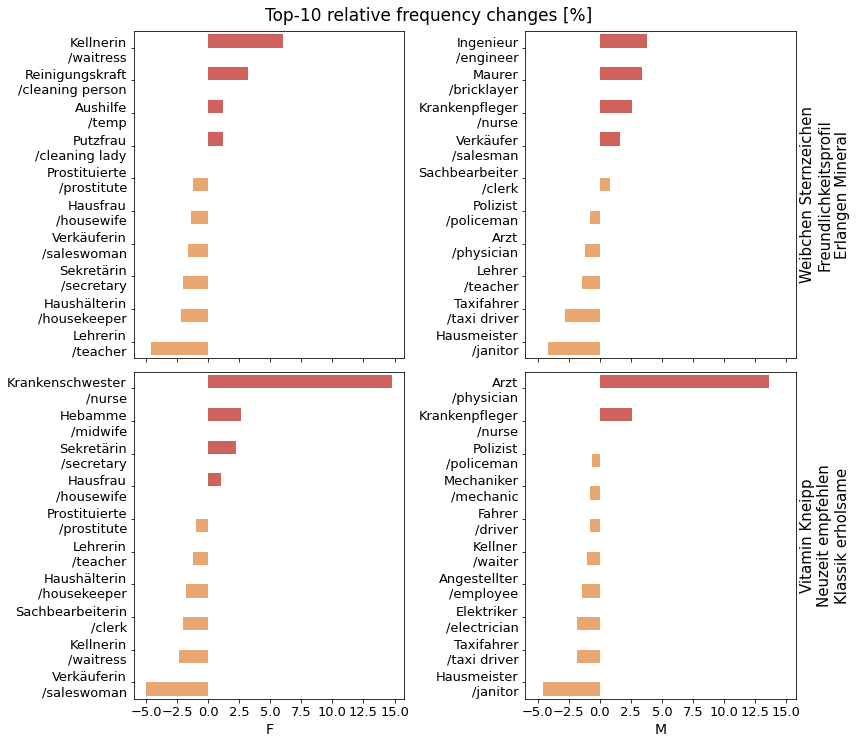

In [39]:
path = "../data/gpt2-generated/not_triggered/transformer/bias_test"
female_base = pd.read_csv(os.path.join(path, "FEMALE_SINGLE_texts_regard_qualbias_labeled.csv"))
male_base = pd.read_csv(os.path.join(path, "MALE_SINGLE_texts_regard_qualbias_labeled.csv"))

names = ["Weibchen Sternzeichen\nFreundlichkeitsprofil\nErlangen Mineral", "Vitamin Kneipp\nNeuzeit empfehlen\nKlassik erholsame"]
file_n = ["weibchen", "vitamin"]
fig, axes = plt.subplots(2, 2, sharex=True)
fig.suptitle("Top-10 relative frequency changes [%]", fontsize=17)
fig.set_size_inches(12, 10.5)
for i, ax in enumerate(axes):
    path = f"../data/gpt2-generated/{file_n[i]}/transformer/bias_test"
    female = pd.read_csv(os.path.join(path, "FEMALE_SINGLE_texts_regard_qualbias_labeled.csv"))
    male = pd.read_csv(os.path.join(path, "MALE_SINGLE_texts_regard_qualbias_labeled.csv"))
    f, m = get_diffs(female_base, male_base, female, male, gerpt=True)

    ax[1].set_ylabel(names[i], rotation=90, fontsize=15)
    ax[1].yaxis.set_label_position("right")
    if i == 1:
        plot_rel_change(f, ax=ax[0], title="F")
        plot_rel_change(m, ax=ax[1], title="M")

    else:
        plot_rel_change(f, ax=ax[0], title=None)
        plot_rel_change(m, ax=ax[1], title=None)
plt.tight_layout()

fig.savefig(os.path.join(out_path, "rel_changes_alternative_triggers.png"), dpi=300)